In [23]:
from PIL import Image
import numpy as np
import imageio

In [2]:
im = Image.open("p5_image.gif")

In [3]:
a = np.asarray(im)

In [4]:
a.shape

(1600, 1170)

In [5]:
im.size

(1170, 1600)

In [6]:
U, S, Vh = np.linalg.svd(a)
V = Vh.T

In [7]:
U.shape

(1600, 1600)

In [8]:
S.shape

(1170,)

In [9]:
V.shape

(1170, 1170)

In [10]:
def rank_K_approximation(K):
    u = U[:, :K]
    s = S[:K]
    vh = Vh[:K, :]
    return np.dot(u, np.dot(np.diag(s), vh))

In [12]:
def image_K_approximation(K):
    a = rank_K_approximation(K)
    l, r = a.min(), a.max()
    mid = (l + r) / 2
    n, m = a.shape
    #a = (a - l) / (r - l)
    for i in range(n):
        for j in range(m):
            a[i, j] = 0 if a[i, j] < mid else 255
    return Image.fromarray(np.uint8(a))

In [20]:
for k in [1, 3, 10, 20, 50, 100, 150, 200, 400, 800, 1170]:
    image = image_K_approximation(k)
    image.save("image_K_{}.png".format(k))

In [24]:
def create_gif(gif_name, duration = 0.3):
    frames = []
    image_list = []
    for k in [1, 3, 10, 20, 50, 100, 150, 200, 400, 800, 1170]:
        image_list.append("image_K_{}.png".format(k))
    
    for image_name in image_list:
        frames.append(imageio.imread(image_name)) 
    imageio.mimsave(gif_name, frames, 'GIF', duration = duration)

    return None

In [26]:
create_gif("part2.gif")

In [21]:
imtest = image_K_approximation(100)

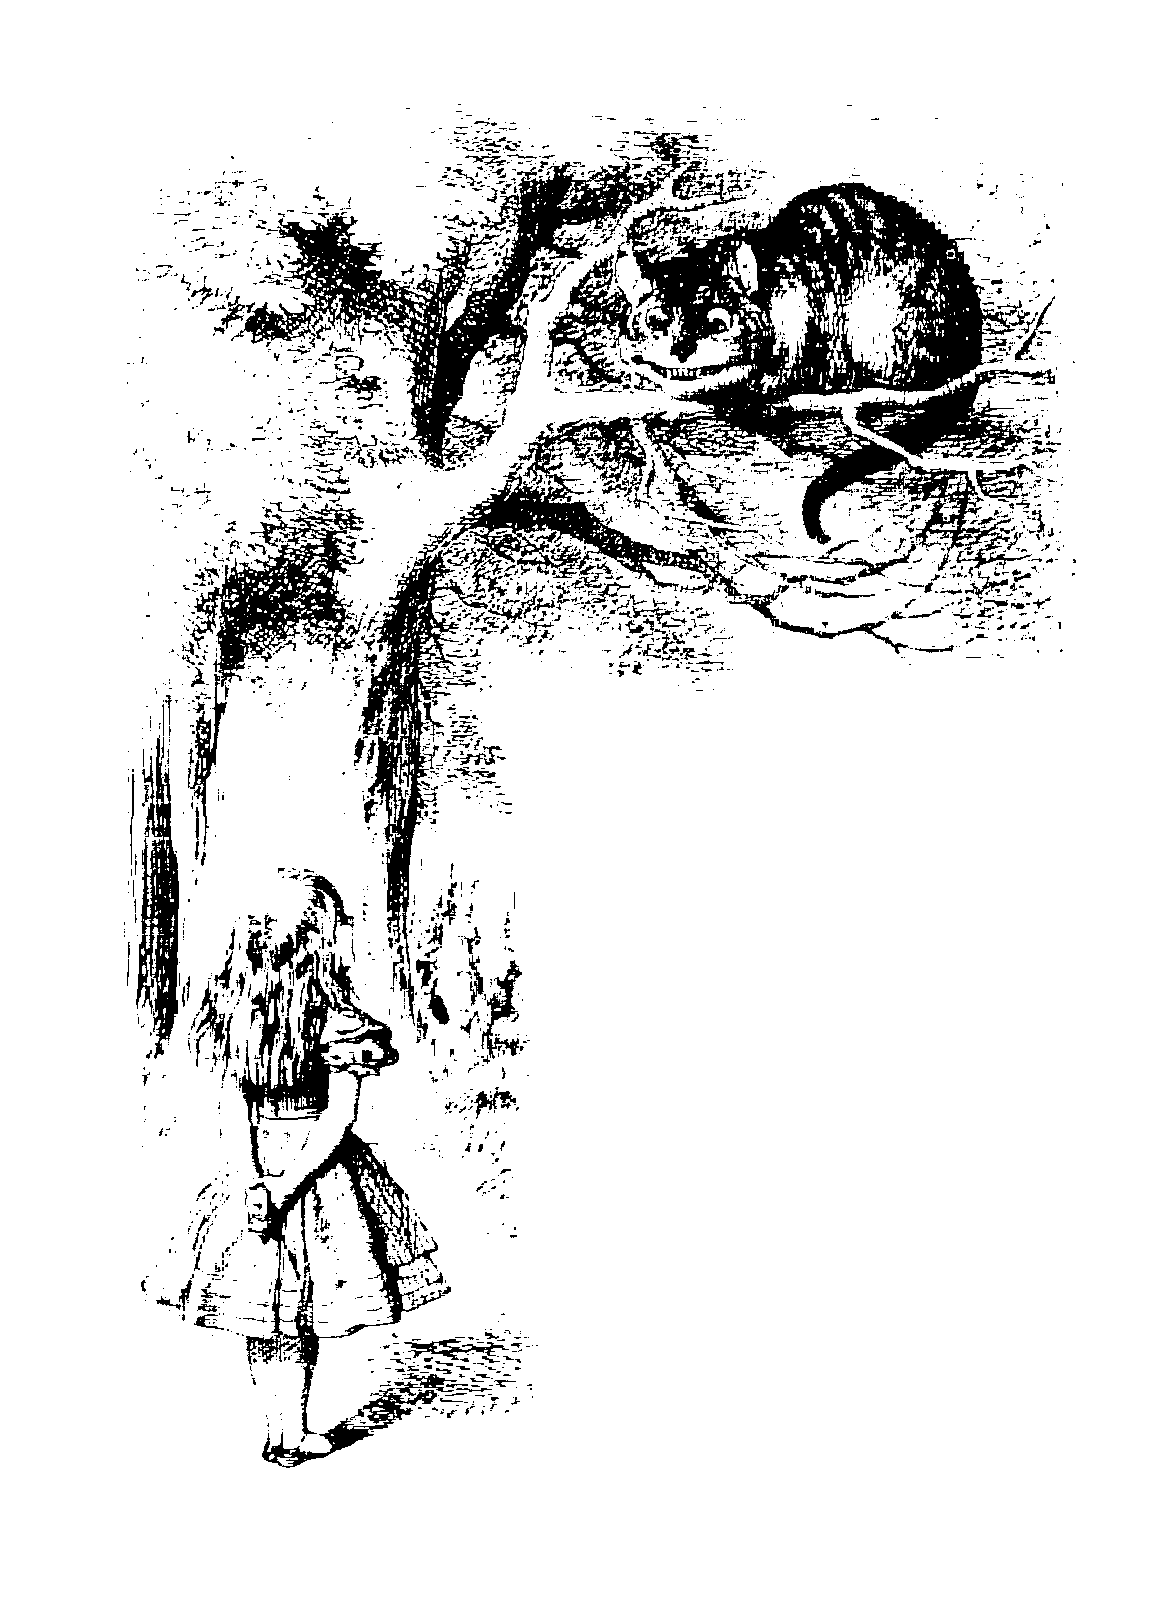

In [22]:
imtest

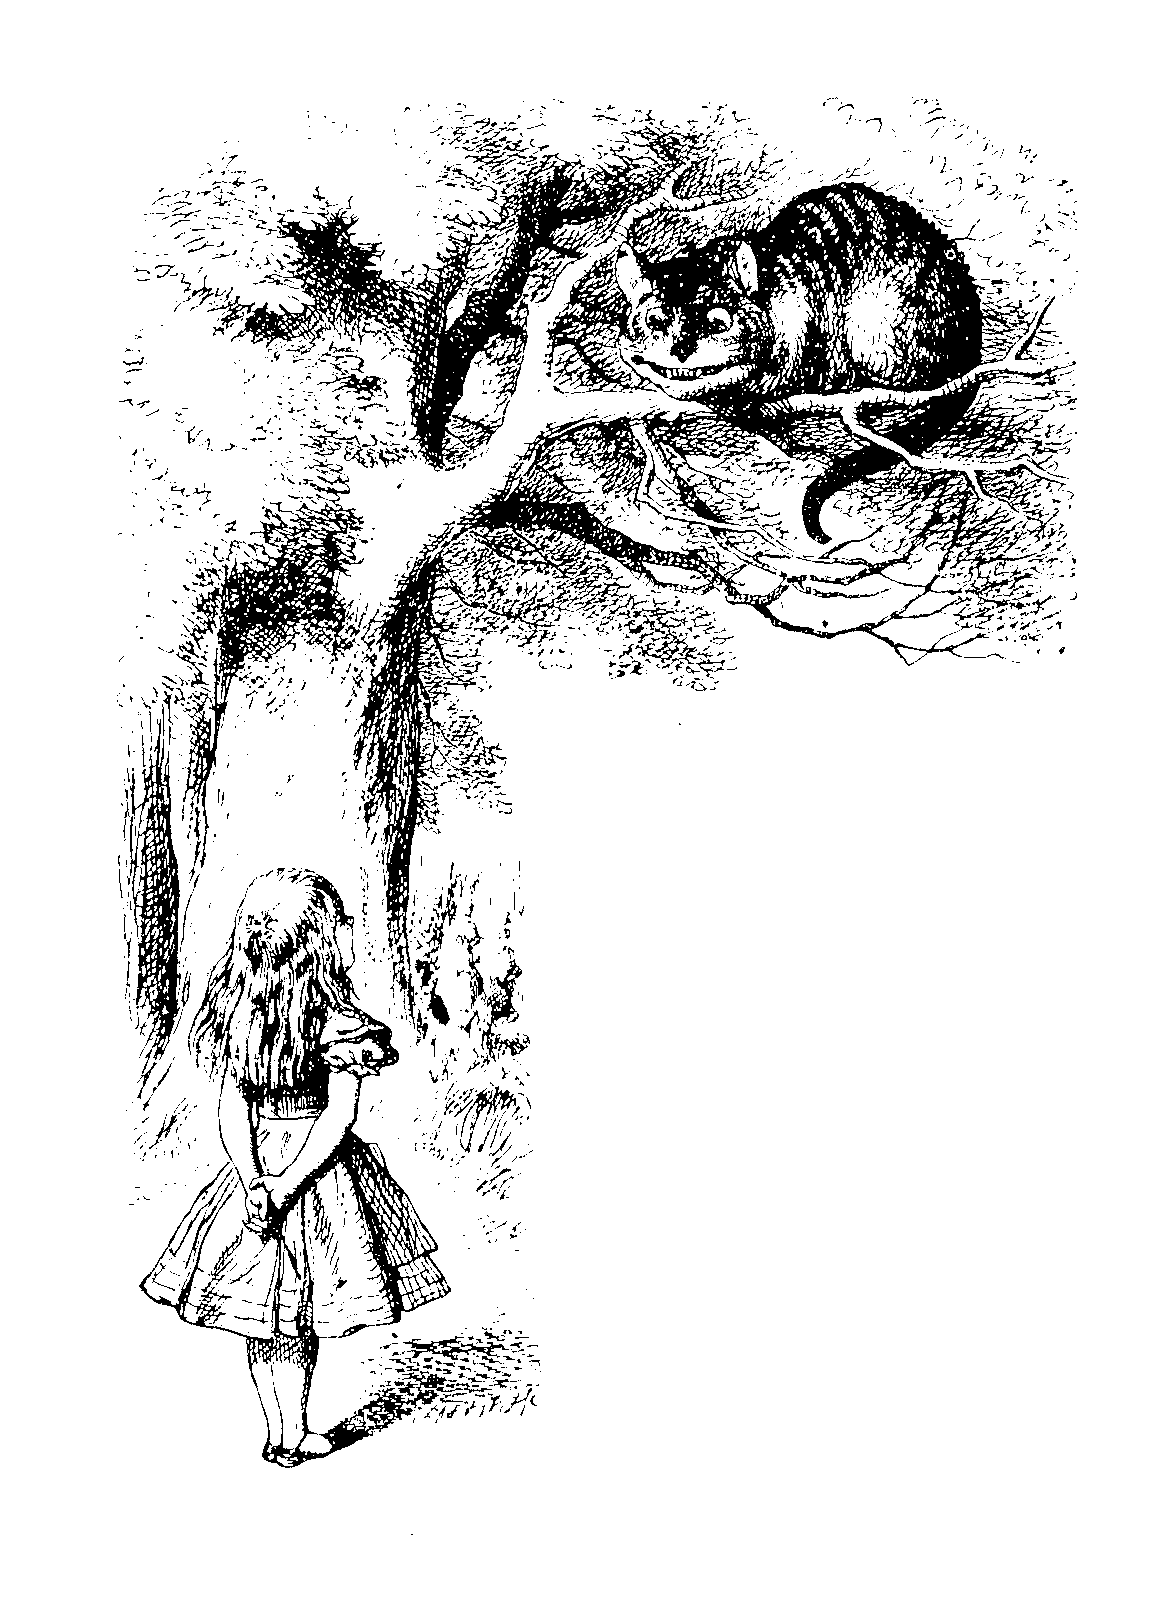

In [17]:
im